# Analyzing performance of Shape Predictor

In [1]:
def read_lmfile(inputfile):
        
        """Parse tps or txt file that contains landmarks
        
        Returns:
            self.lm_dict (Dict): Dictionary that contains flip_images (basename) as keys and landmarks as values
            self.img_list (List): List of flip_images (basename)
            Landmarks.nested_dict (Dict): Nested Dictionary with ID, SCALE and LM for every image (og_name)
        """
        landmarks_dict = {}
        landmarks = []
        image_list = []
        check = False
        with open(inputfile, 'r') as file:
      
            for line in file:
                
                # Process expected line, "LANDMARKS" 
                if line.startswith("LM"):
                    n_lm = int(line.strip().split('=')[1])
                    
                    if n_lm == 0:
                        print(f"WARNING: No landmarks annotated for this image")
                    
                    # Read all the landmarks
                    else: 
                        check = False
                        i = 0
                        lm_list = []
                        while i < n_lm:
                            landmark_line = next(file).strip().split() 
                            lm_list.append([float(landmark_line[0]), float(landmark_line[1])])
                            landmarks.append([float(landmark_line[0]), float(landmark_line[1])])
                            i+=1
                    if n_lm != 12:
                        print(f"What the fuck happens here")
                        check = True
                    else: 
                        check = False
                        

                    # Process the next expected line, "IMAGE"
                    next_line = file.readline()
                    
                    if next_line.startswith("IMAGE"):
                        image_name = str(next_line.strip().split('=')[1])
                        image_list.append(image_name)
                        landmarks_dict[image_name] = lm_list
                        if check == True:
                            print(f'Image {image_name} has only {n_lm} landmarks annotated')
                                            
                    # Process the next expected line, "ID"
                    next_line = file.readline()
                    
                    if next_line.startswith("ID"):
                        real_id = str(next_line.strip().split('=')[1])
                    
                    # Process the next expected line, "SCALE"
                    next_line = file.readline()
                    
                    if next_line.startswith("SCALE"):
                        scale = next_line.strip()
        
        return landmarks, image_list, dict(sorted(landmarks_dict.items()))

In [2]:
prediction_file = '/Users/luciamf/Desktop/Landmarks_generator/example/carabus_landmarks/carabus_landmarks.txt'
train_file = '/Users/luciamf/Desktop/Landmarks_generator/example/Carabus_pronotum_train.txt'

In [11]:
pred_landmarks, image_pred, pred_dict = read_lmfile(prediction_file)
real_landmarks, image_real, real_dict = read_lmfile(train_file)

pred_landmarks = []
for image, landmarks in pred_dict.items():
    pred_landmarks.append(landmarks)

real_landmarks = []
for image, landmarks in real_dict.items():
    real_landmarks.append(landmarks)

In [15]:
len(image_real), len(image_pred)
len(pred_landmarks), len(real_landmarks)

(319, 319)

In [23]:
def get_xy(landmarks):
    x_list = []
    y_list = []
    for coor in landmarks:
        for x,y in coor:
            x_list.append(x)
            y_list.append(y)
       
        
    
    return x_list,y_list

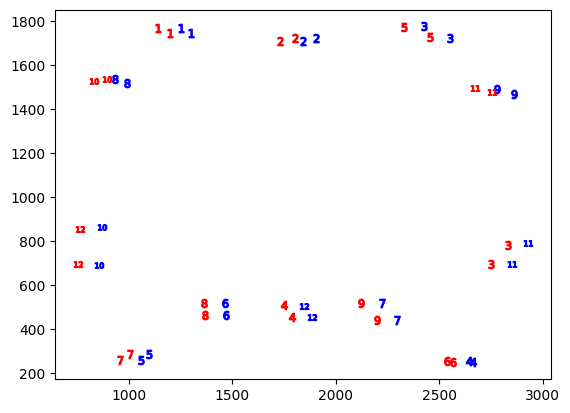

In [38]:
def plot_shape(landmarks1, landmarks2):
    for j in range(len(landmarks1)):
        i = 0
        for x,y in landmarks1[j]:
            i+=1
            plt.scatter(x,y, color ='red', marker="$"+str(i)+"$")
        i = 0
        for x,y in landmarks2[j]:
            i+=1
            plt.scatter(x+100,y, color = 'blue', marker="$"+str(i)+"$")
        if j == 1:
            break
plot_shape(pred_landmarks, real_landmarks)

In [27]:
x_pred,y_pred = get_xy(pred_landmarks)
x_real,y_real = get_xy(real_landmarks)

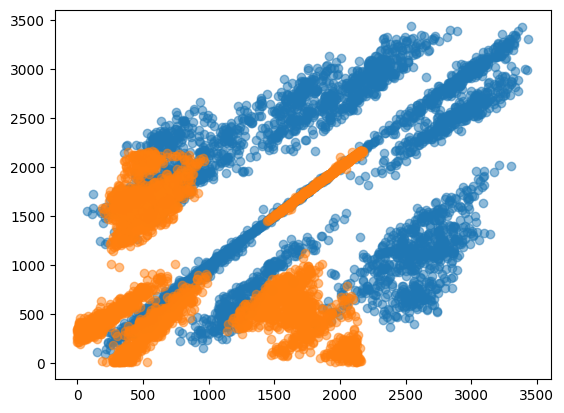

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x_pred, x_real, alpha = 0.5)
plt.scatter(y_pred, y_real, alpha = 0.5)

Tiene pinta de que estan ordenadas diferente las landmarks